# Importing Libraries

In [3]:
!pip install tensorflow matplotlib numpy pandas seaborn


In [5]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries from TensorFlow
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


# Displaying Images

In [12]:
picture_size = 48
folder_path = r"D:\aittpbl\face-expression-recognition-dataset\\"

Image path: D:\aittpbl\face-expression-recognition-dataset copy\images\images\train\disgust\10018.jpg
Image path: D:\aittpbl\face-expression-recognition-dataset copy\images\images\train\disgust\10022.jpg
Image path: D:\aittpbl\face-expression-recognition-dataset copy\images\images\train\disgust\10112.jpg
Image path: D:\aittpbl\face-expression-recognition-dataset copy\images\images\train\disgust\10137.jpg
Image path: D:\aittpbl\face-expression-recognition-dataset copy\images\images\train\disgust\10236.jpg
Image path: D:\aittpbl\face-expression-recognition-dataset copy\images\images\train\disgust\10316.jpg
Image path: D:\aittpbl\face-expression-recognition-dataset copy\images\images\train\disgust\10414.jpg
Image path: D:\aittpbl\face-expression-recognition-dataset copy\images\images\train\disgust\10521.jpg
Image path: D:\aittpbl\face-expression-recognition-dataset copy\images\images\train\disgust\10538.jpg


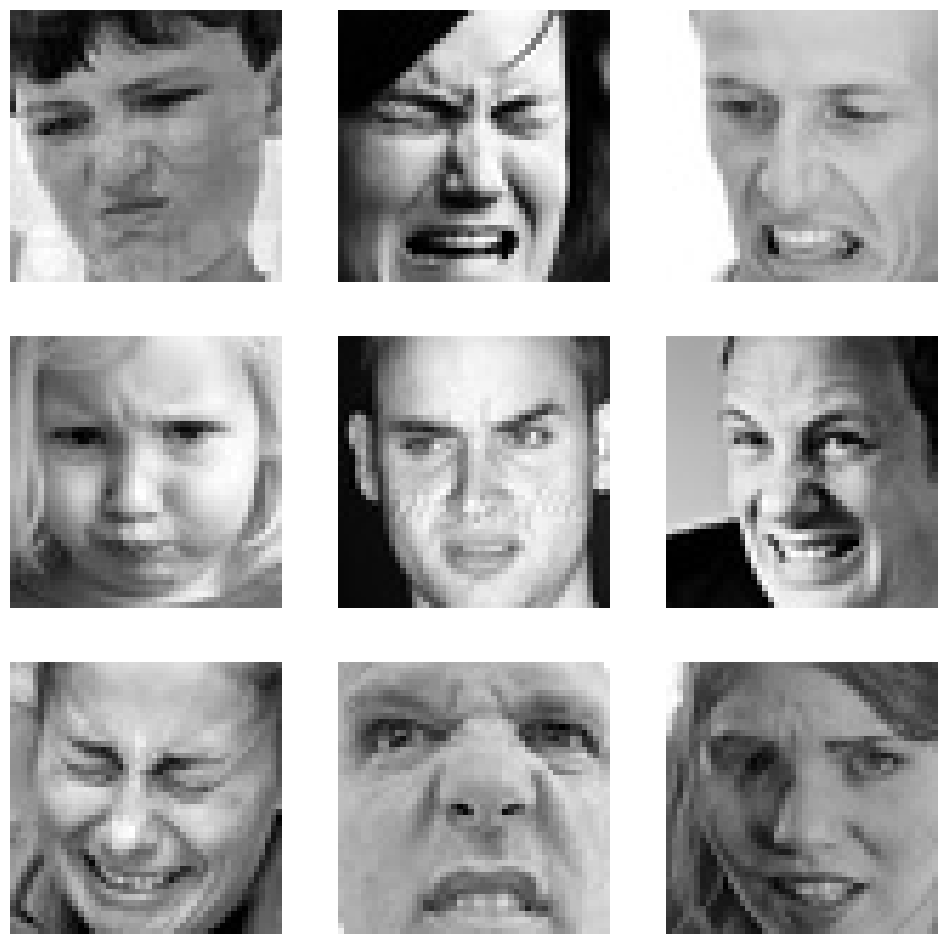

In [21]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define picture size and folder path
picture_size = 48  # Desired size for resizing images
folder_path = r"D:\aittpbl\face-expression-recognition-dataset copy\images\images"  # Using raw string

expression = 'disgust'

# Construct the full path to the expression folder
expression_folder = os.path.join(folder_path, "train", expression)

# Check if the expression folder exists
if not os.path.exists(expression_folder):
    print(f"Error: The folder '{expression_folder}' does not exist.")
else:
    # Get list of images in the expression folder
    img_list = os.listdir(expression_folder)
    
    # Create a figure to display images
    plt.figure(figsize=(12, 12))

    # Loop through images, limit to the first 9 available
    for i in range(min(9, len(img_list))):
        img_path = os.path.join(expression_folder, img_list[i])
        print(f"Image path: {img_path}")  # Print the path for debugging
        
        try:
            img = Image.open(img_path).resize((picture_size, picture_size))  # Open and resize image
            plt.subplot(3, 3, i + 1)  # Adjust subplot indexing
            plt.imshow(img, cmap='gray')  # Display image
            plt.axis('off')  # Hide axis
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

    plt.show()  # Show all images


# Making Training and Validation Data

In [25]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define picture size and folder paths
picture_size = 48  # Desired size for resizing images
train_folder_path = r"D:\aittpbl\face-expression-recognition-dataset\images\images\train"  # Training path
validation_folder_path = r"D:\aittpbl\face-expression-recognition-dataset\images\images\validation"  # Validation path

# Print the paths to debug
print(f"Training path: {train_folder_path}")
print(f"Validation path: {validation_folder_path}")

# Setting batch size
batch_size = 128

# Data generators
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

# Check if the training directory exists before creating the train set
if not os.path.exists(train_folder_path):
    print(f"Error: Training folder does not exist at {train_folder_path}")
else:
    train_set = datagen_train.flow_from_directory(
        train_folder_path,
        target_size=(picture_size, picture_size),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

# Check if the validation directory exists before creating the test set
if not os.path.exists(validation_folder_path):
    print(f"Error: Validation folder does not exist at {validation_folder_path}")
else:
    test_set = datagen_val.flow_from_directory(
        validation_folder_path,
        target_size=(picture_size, picture_size),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )


Training path: D:\aittpbl\face-expression-recognition-dataset\images\images\train
Validation path: D:\aittpbl\face-expression-recognition-dataset\images\images\validation
Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [27]:
from keras.optimizers import Adam, SGD, RMSprop

no_of_classes = 7

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

# Update the optimizer initialization
opt = Adam(learning_rate=0.0001)  # Use learning_rate instead of lr
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

# Fitting the Model with Training and Validation Data 

In [29]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Update the checkpoint file path to use the .keras extension
checkpoint = ModelCheckpoint("./model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.2,
                                         patience=3,
                                         verbose=1,
                                         min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 48

# Update the optimizer initialization to use learning_rate instead of lr
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Change lr to learning_rate
              metrics=['accuracy'])


In [ ]:
# Using the fit method directly
history = model.fit(
    train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callbacks_list
)


Epoch 1/48
 69/225 ━━━━━━━━━━━━━━━━━━━━ 14:27 6s/step - accuracy: 0.3628 - loss: 1.6693

# Plotting Accuracy & Loss

NameError: name 'history' is not defined

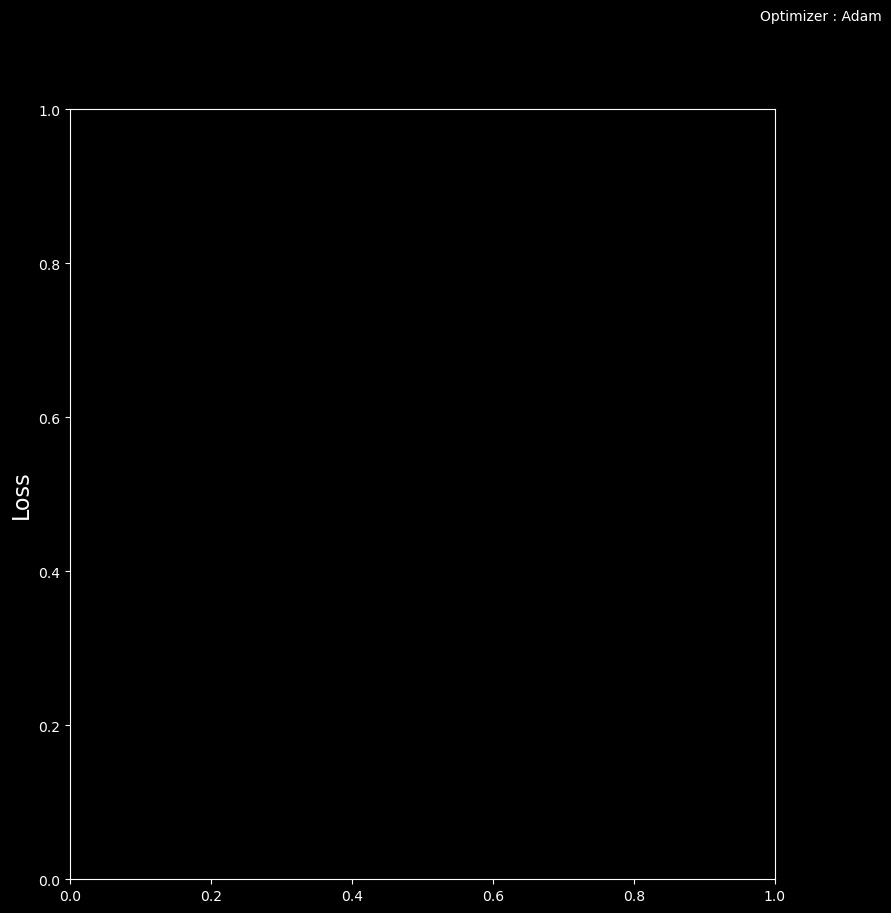

In [32]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()